In [8]:
import holoviews as hv
hv.extension('bokeh')
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas 
import datetime

%matplotlib inline


AttributeError: module 'numpy' has no attribute 'random'

In [2]:
# Extract csv data and store the data into "df" variable.
read_csv=pd.read_csv("train.csv")
df=read_csv.copy()

In [3]:
# To quickly review the data by looking at only first five rows of data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check how many rows of data for each column has "null" values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Can the data answer the questions?

* From my observation at the data, the following information is present to make an estimate for a home's sales prices: size, number of bedrooms, number of bathrooms, the year it was built, and ordinal data (Overall quality of the home, 1-10, 10 being "Very Excellent"). As well as nominal data (Neighborhood), and a host of other features. So far, the data passes an initial sniff test. 

In [5]:
hist_plot=df.hvplot.hist("SalePrice",xformatter='$%.0f', title='Distribution of Home Prices: Ames, Iowa 2006-2011', 
                         ylabel='Count', xlabel=' Sales Price (USD)')
display(hist_plot)

:Histogram   [SalePrice]   (SalePrice_count)

In [6]:
hist_df=hist_plot.dframe()
hist_df

,SalePrice,SalePrice_count
0,52902.5,22
1,88907.5,126
2,124912.5,380
3,160917.5,343
4,196922.5,229
5,232927.5,144
6,268932.5,86
7,304937.5,49
8,340942.5,28
9,376947.5,23


In [7]:
# I will use the describe method to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding``NaN`` values.

df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
# Sum of houses with sale price in the $200,000 range
hist_df[(hist_df['SalePrice']>=200000) & (hist_df['SalePrice']<=299999)].sum()['SalePrice_count']

230.0

# Insights
---
```
There are total of 230 homes in the $200,000 range, and a long tail to the right showing the most expensive homes. That tail pulls the mean sales price ($181,000) past the median price ($163,000). A handful of expensive homes makes the mean larger than the median value.
```

In [9]:
box_plot=df.hvplot.box(y='SalePrice', by='OverallQual', yformatter='$%.0f', ylabel='Sales Price (USD)', 
              xlabel='Overall Quality of Home', title='Comparing Home Prices: Ames, Iowa 2006-2011', ).sort()
display(box_plot)

:BoxWhisker   [OverallQual]   (SalePrice)

# Insights
---
```
 Here, the relationship between overall quality and home prices feels intuitive. Higher-quality homes typically have a higher sales price. We can spot a $200,000 home with an overall quality score of 10 (the bottom tip of the line), but it seems reasonable to assume it sold for less than other perfect-10 homes due to other factors. 
```

---

In [10]:
# A bar chart showing the counts by types of electrical installation

df.Electrical.value_counts().hvplot.bar(title='Count of Homes by Electrical Types', ylabel='Count', xlabel='Electrical Types')

:Bars   [index]   (Electrical)

# Not all visualization will be interesting at first glance. However, it's still a good idea to view such visualizations if only to reinforce (or perhaps challenge) the previous question -does the data make intuitive sense?

# This bar chart shows almost all homes have the same value for this feature. This information is helpful. Since most homes have the same value for this variable, it likely won't contribute to any meaningful differences in the sales price of homes.

---

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
cols=['MoSold', 'YrSold']
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   Alley          91 non-null     object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,date
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01


In [17]:
homes_sold_month=df.groupby('date').size().reset_index(name='number_of_homes_sold')
homes_sold_month.head()

,date,number_of_homes_sold
0,2006-01-01,10
1,2006-02-01,9
2,2006-03-01,25
3,2006-04-01,27
4,2006-05-01,38


In [18]:
# Line chart to spot trend and showing the number of houses sold in different months
homes_sold_month.hvplot.line(x='date', y='number_of_homes_sold', title='Number of Homes Sold by Month')

:Curve   [date]   (number_of_homes_sold)

# This data visualization display seasonality where home sales spike in summer and retract in the winter


---

In [19]:
# A scatter plot showing square footage and sales price

scatt_plot=df.hvplot.scatter(x='1stFlrSF',y='SalePrice', title='Home Size and Sales Price', xlabel='Sq Ft on First Floor', ylabel='Sales Price (USD)', yformatter='$%.0f')
scatt_plot

:Scatter   [1stFlrSF]   (SalePrice)

# Did you discover any relationship?

## This scatter plot shows higher overall quality and larger square footage are related to higher sales prices. 
---

In [20]:
scatt_plot.dframe().corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


## What other variables share a relationship with sales price?

In [21]:
heatmap = df.corr().hvplot.heatmap(rot=90,  height=600, width=700)
heatmap

:HeatMap   [columns,index]   (value)

## Square footage and sales price have a correlation of 0.62, which measures the tightness of the data points around the solid linear trend line.

Assuming the line of best fit for a set of points is given by:

$y = a + b x$

where:

$b = \Large{\frac{\sum x_i  y_i - n \bar x\bar y )} {\sum (x_i - \bar x)^2}} $

and

$a = \bar y - b \bar x$

#### Source: https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python

best fit line:
y = 36173.45 + 124.50x


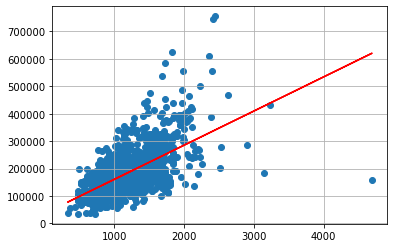

In [22]:
X = list(df['1stFlrSF'])
Y = list(df['SalePrice'])

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

a, b = best_fit(X, Y)

# plot points and fit line

plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit, color='red')
plt.grid()
plt.show()

In [23]:

# Or you can have HoloViews calculate it for you with hv.Slope.from_scatter():
scatt_best_fit_line=scatt_plot.opts(size=10) * hv.Slope.from_scatter(scatt_plot ).opts(color='red')
scatt_best_fit_line

:Overlay
   .Scatter.I    :Scatter   [1stFlrSF]   (SalePrice)
   .Annotation.I :Slope   [x,y]